To run this example locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/quick-start.html) and execute: `ploomber examples -n templates/spec-api-sql`

[![binder-logo](https://raw.githubusercontent.com/ploomber/projects/master/_static/open-in-jupyterlab.svg)](https://binder.ploomber.io/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Ftemplates/spec-api-sql%252FREADME.ipynb%26branch%3Dmaster)

Found an issue? [Let us know.](https://github.com/ploomber/projects/issues/new?title=templates/spec-api-sql%20issue)

Have questions? [Ask us anything on Slack.](https://ploomber.io/community/)



# SQL/Python pipeline

<!-- start description -->
Use SQL scripts to manipulate data in a database, dump a table, and plot it with Python.
<!-- end description -->

## Create sample data


In [1]:
%%bash
# create sample data
cd setup
bash setup.sh
# move back to the original spec-api-sql folder
cd ..

## Definition

```yaml
# Content of pipeline.yaml
meta:
  product_default_class:
    SQLScript: SQLiteRelation

  jupyter_hot_reload: True

config:
  hot_reload: True

clients:
  # tasks
  SQLScript: config.get_client
  SQLDump: config.get_client
  # products
  SQLiteRelation: config.get_client

tasks:
  - source: filter_sales.sql
    product: [filtered_sales, table]
    name: filter_sales

  - source: group_sales.sql
    product: [grouped_sales, table]
    name: group_sales

  - source: filter_prices.sql
    product: [filtered_prices, table]
    name: filter_prices

  - source: join.sql
    product: [joined, table]
    name: join

  - class: SQLDump
    source: join_dump.sql
    product: output/joined_data.csv
    name: join_dump
    chunksize: null

  - source: plot.py
    product: output/plot.html
```

The first two sections configure our pipeline; the `tasks` section is the
actual pipeline definition. First, we see that we have a few SQL transformations,
then we dump a table into a CSV file and produce an HTML report at the end.
The order here doesn't matter, the source code itself declares its upstream dependencies, and Ploomber extracts them to execute your pipeline.

## Plot

In [2]:
%%bash
ploomber plot

Loading pipeline...
Plot saved at: pipeline.png


If running in Jupyter, load the plot with this code:

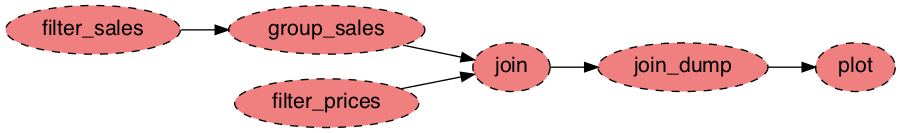

In [3]:
from IPython.display import Image
Image(filename='pipeline.png')

# NOTE: ploomber plot will generate a pipeline.html (not .png) file if
# pygraphviz is missing. In such case, open the file to view the pipeline plot

Otherwise, open the `pipeline.png` file directly.

## Build

In [4]:
%%bash
ploomber build

Loading pipeline...
name           Ran?      Elapsed (s)    Percentage
-------------  ------  -------------  ------------
filter_sales   True         0.005482     0.15679
filter_prices  True         0.001386     0.0396408
group_sales    True         0.001327     0.0379533
join           True         0.001258     0.0359799
join_dump      True         0.002534     0.0724746
plot           True         3.48441     99.6572


/Users/Edu/dev/ploomber/src/ploomber/cli/cloud.py:165: UserWarning: Issue: Non cloud users can monitor up to 2 pipelines simultaneously
  warnings.warn(content)
Building task 'plot': 100%|██████████| 6/6 [00:03<00:00,  1.70it/s]
/Users/Edu/dev/ploomber/src/ploomber/cli/cloud.py:165: UserWarning: Issue: Non cloud users can monitor up to 2 pipelines simultaneously
  warnings.warn(content)


The final output is a report: [output/plot.html](output/plot.html).